Study Various Feature extraction techniques to extract the Image Descriptors

1. HoG
2. LBP Texture
3. Color Histogram
4. Hu Moments and Zernlike Moments
5. Haralick Textures

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
import mahotas
from skimage import feature
import numpy as np
import mahotas as mt


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# reading the dataset

dataset = pd.read_csv("E:\Final_Year_Project\Implementation\Image-Text-NN-SC-Detection\Analysis\HAM10000_metadata.csv")
dataset.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [4]:
# The diesease- dx is made into a more human readable format of which type of skin cancer cell it is
lesion_type_dict = {
                    'nv': 'Melanocytic nevi',
                    'mel': 'Melanoma',
                    'bkl': 'Benign keratosis-like lesions ',
                    'bcc': 'Basal cell carcinoma',
                    'akiec': 'Actinic keratoses',
                    'vasc': 'Vascular lesions',
                    'df': 'Dermatofibroma'
                    }

dataset['cell_type'] = dataset['dx'].map(lesion_type_dict.get) 
dataset['cell_type_idx'] = pd.Categorical(dataset['cell_type']).codes


    
localization_type_dict = {'abdomen': 50,
                            'acral': 100,
                            'back': 150,
                            'chest': 200,
                            'ear': 250,
                            'face': 51,
                            'foot': 101,
                            'genital': 151,
                            'hand': 201,
                            'lower extremity': 251,
                            'neck': 52,
                            'scalp': 102,
                            'trunk': 152,
                            'unknown': 202,
                            'upper extremity': 252}

gender_type_dict = {'male': 25,
                    'female': 50}

dataset['Feature_1'] = dataset['localization'].map(localization_type_dict.get) 
dataset['Feature_2'] = dataset['sex'].map(gender_type_dict.get)

dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,2,250,25.0


In [5]:
dataset['age'].value_counts()

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

In [10]:
# imputation with median values as we have an ordinal variable age, and less sensitive to extremes
dataset["age"].fillna(dataset.age.median(), inplace = True)

In [6]:
dataset.loc[dataset['age'] == 0.0] = dataset.age.median()
dataset.age.value_counts()

45.0    1299
50.0    1283
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
Name: age, dtype: int64

In [6]:
# Define image path

base_skin_dir = os.path.join("..","Data")
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir,'*','*.jpg'))}

dataset['path'] = dataset['image_id'].map(imageid_path_dict.get)
dataset.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,2,250,25.0,..\Data\HAM10000_images_part_2\ISIC_0031633.jpg


In [8]:
# loading into dataframe
dataset['image'] = dataset['path'].map(lambda x: np.asarray(Image.open(x).resize((256,246))))

In [9]:
dataset['age'] = dataset['age'].replace(0,dataset.age.median())

In [ ]:
dataset['image_id'].head()

0    ISIC_0027419
1    ISIC_0025030
2    ISIC_0026769
3    ISIC_0025661
4    ISIC_0031633
Name: image_id, dtype: object

### Data Augmentation - Shear, Flip, Brightness

In [ ]:
# train_generator=datagen.flow_from_dataframe(dataframe=dataset, \
#      x_col="path", y_col="cell_type",save_to_dir="E:/Final_Year_Project/Implementation/Image-Text-NN-SC-Detection/New_Data",  \
#          save_format='png', class_mode="categorical")

Resample based on distribution as these represent real world traits and Population Distribution should remain same

In [11]:

# check all distribution of classes

class_count = dataset['cell_type'].value_counts()
def handle_imbalance_classes(dataset, class_count):
    
    balanced_df = pd.DataFrame(columns=dataset.columns)
    
    u_class = list(class_count[class_count > 300].index)
    o_class = list(class_count[class_count <= 300].index)
    print(f"Classes to be Undersampled: {u_class}")
    print(f"Classes to be Oversampled: {o_class}")
    
    # Oversampling
    ratio_dict = {}
    for x in o_class:
        print(f"Oversampling CLass.....{x}")
        temp = dataset[dataset['cell_type'] == x].copy()
        get_ratio = (200 - len(temp['cell_type']))/ len(temp['cell_type'])
        ratio_dict[x] = get_ratio
        
        # resample based on population distribution
        filtered_df = temp.groupby(['localization', 'age', 'sex'], group_keys=False).apply(lambda x: x.sample(frac=get_ratio)).copy()
        filtered_df.reset_index(inplace=True)
        filtered_df.infer_objects().dtypes
        print(f"Augmented DataFrame Shape: {filtered_df.shape}")
        #data_type_dict = {'image': np.array()}
        # change image names
        for i in range(len(filtered_df)):
            img_name = str(filtered_df.loc[i,'image_id']) + "_HVA"
            img_with_format = img_name+'.jpg'
            filtered_df.loc[i,'image_id'] = img_name
            pathname = r"E:\Final_Year_Project\Implementation\Image-Text-NN-SC-Detection\Data\HAM10000_images_part_3"
            if i & 1:
                h_flip = cv2.rotate(filtered_df.loc[i,'image'], cv2.ROTATE_180)
                print(type(h_flip))
                #filtered_df.loc[:,'image'].loc[i] = h_flip
                save_to_path = os.path.join(pathname,img_with_format)
                #filtered_df.loc[i,'path'] = save_to_path
                cv2.imwrite(save_to_path,cv2.cvtColor(h_flip, cv2.COLOR_RGB2BGR))
            else:
                v_flip = cv2.flip(filtered_df.loc[i,'image'], 0)
                print(filtered_df.loc[i,'image'].shape, v_flip.shape)
                #filtered_df.loc[:,'image'].loc[i] = v_flip
                save_to_path = os.path.join(pathname,img_with_format)
                #filtered_df.loc[i,'path'] = save_to_path
                cv2.imwrite(save_to_path,cv2.cvtColor(v_flip, cv2.COLOR_RGB2BGR))
                
        frames = [balanced_df, filtered_df, temp]
        balanced_df = pd.concat(frames)
        
    return balanced_df
    
    
oversampled_df = handle_imbalance_classes(dataset, class_count)

Classes to be Undersampled: ['Melanocytic nevi', 'Melanoma', 'Benign keratosis-like lesions ', 'Basal cell carcinoma', 'Actinic keratoses']
Classes to be Oversampled: ['Vascular lesions', 'Dermatofibroma']
Oversampling CLass.....Vascular lesions
Augmented DataFrame Shape: (52, 15)
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.ndarray'>
(246, 256, 3) (246, 256, 3)
<class 'numpy.

## Important Cell

In [12]:
oversampled_df = oversampled_df.drop(['path','image','index'],axis=1)
oversampled_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2
0,HAM_0006617,ISIC_0028163_HVA,vasc,histo,25.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0
1,HAM_0006852,ISIC_0032715_HVA,vasc,consensus,45.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0
2,HAM_0006852,ISIC_0033991_HVA,vasc,consensus,45.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0
3,HAM_0002610,ISIC_0026876_HVA,vasc,consensus,50.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0
4,HAM_0000460,ISIC_0025197_HVA,vasc,consensus,50.0,female,abdomen,vidir_molemax,Vascular lesions,6,50,50.0


In [13]:
oversampled_df.shape

(390, 12)

In [14]:
# Define image path

base_skin_dir = os.path.join("..","Data")
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir,'*','*.jpg'))}

oversampled_df['path'] = oversampled_df['image_id'].map(imageid_path_dict.get)

oversampled_df['path'].iloc[5]


'..\\Data\\HAM10000_images_part_3\\ISIC_0029439_HVA.jpg'

In [15]:
# loading into dataframe
oversampled_df['image'] =oversampled_df['path'].map(lambda x: np.asarray(Image.open(x).resize((256,246))))

In [13]:
oversampled_df['image_id'].head(5)

0    ISIC_0024669_HVA
1    ISIC_0033991_HVA
2    ISIC_0032715_HVA
3    ISIC_0025197_HVA
4    ISIC_0026876_HVA
Name: image_id, dtype: object

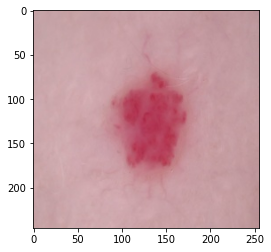

In [14]:
plt.imshow(oversampled_df['image'].iloc[1])

#### Undersampling

In [16]:
s = pd.Series({'Melanocytic nevi': 0.2, 'Melanoma': 0.2, 'Benign keratosis-like lesions ': 0.2, 'Basal cell carcinoma': 0.2,
               'Actinic keratoses':0.2})
undersampled_df = dataset.sample(1010, weights=dataset['cell_type'].map(s/dataset['cell_type'].value_counts()))
undersampled_df.shape

(1010, 14)

In [17]:
frames = [oversampled_df, undersampled_df]
new_dataset = pd.concat(frames)
new_dataset.shape

(1400, 14)

In [31]:
new_dataset.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
dataset          0
cell_type        0
cell_type_idx    0
Feature_1        0
Feature_2        3
path             0
image            0
dtype: int64

In [21]:
new_dataset.drop(['index'],axis=1,inplace=True)


KeyboardInterrupt



In [18]:
new_dataset.dropna(inplace=True)
new_dataset.shape


(1394, 14)

Adding the Features

In [21]:
def generate_text_image(image, f1, f2, f3):
    l,b,h=image.shape# Reshape the pixel values array to match the image dimensions
    image_array = np.zeros((10, b, 3), dtype=np.uint8)
    
    for i, c in zip(range(10),range(255)):
      for j in range(b):
        image_array[i, j, 0] = int((f1+c)%255)
        image_array[i, j, 1] = int((f2*c)%255)
        image_array[i, j, 2] = int((f3+2*c)%255)
      

    return image_array
        
def add_text_feature(image, feature_img_arr):
  
  # Concatenate the images vertically
  concatenated_image = np.concatenate((image, feature_img_arr), axis=0) 
  #print(f"Original shape of the image: {image.shape}")
  #print(f"New shape of the image: {concatenated_image.shape}")
  
  return concatenated_image

In [19]:
## always run this

new_dataset.reset_index(inplace=True)
new_dataset.loc[:,'image'].loc[0].shape

(246, 256, 3)

In [40]:
x = generate_text_image(new_dataset.iloc[61]['image'], new_dataset.iloc[61]['age'], new_dataset.iloc[61]['Feature_1'], new_dataset.iloc[61]['Feature_2'])
x = add_text_feature(new_dataset.iloc[61]['image'], x)
x.shape


Original shape of the image: (246, 256, 3)
New shape of the image: (256, 256, 3)


(256, 256, 3)

In [42]:
from sklearn.decomposition import PCA

def pca_image(image, n_components):
    blue,green,red = cv2.split(image)
    
    #initialize PCA with first 20 principal components
    pca = PCA(n_components,svd_solver='full')
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    red_ratio = sum(pca.explained_variance_ratio_)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    green_ratio = sum(pca.explained_variance_ratio_)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    blue_ratio = sum(pca.explained_variance_ratio_)
    
    img_compressed = (np.dstack((blue_transformed, green_transformed, red_transformed))).astype(np.uint8)
    
    return img_compressed

In [56]:
new_dataset.loc[:,'image'].loc[0]

0    [[[128, 105, 89], [134, 111, 95], [139, 116, 1...
0    [[[39, 29, 38], [40, 30, 39], [41, 31, 40], [4...
0    [[[187, 149, 192], [189, 152, 194], [191, 155,...
Name: image, dtype: object

In [69]:
new_dataset.drop(['New_Image'],axis=1)

,level_0,index,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2,path,image
0,0,0,HAM_0006617,ISIC_0024669_HVA,vasc,histo,25.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0,..\Data\HAM10000_images_part_3\ISIC_0024669_HV...,"[[[128, 105, 89], [134, 111, 95], [139, 116, 1..."
1,1,1,HAM_0005938,ISIC_0025596_HVA,vasc,consensus,45.0,female,abdomen,vidir_molemax,Vascular lesions,6,50,50.0,..\Data\HAM10000_images_part_3\ISIC_0025596_HV...,"[[[196, 148, 162], [198, 150, 164], [199, 151,..."
2,2,2,HAM_0006852,ISIC_0032715_HVA,vasc,consensus,45.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0,..\Data\HAM10000_images_part_3\ISIC_0032715_HV...,"[[[181, 149, 162], [179, 147, 160], [179, 145,..."
3,3,3,HAM_0002610,ISIC_0026876_HVA,vasc,consensus,50.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0,..\Data\HAM10000_images_part_3\ISIC_0026876_HV...,"[[[199, 170, 175], [200, 171, 176], [201, 172,..."
4,4,4,HAM_0002610,ISIC_0030606_HVA,vasc,consensus,50.0,female,abdomen,vidir_modern,Vascular lesions,6,50,50.0,..\Data\HAM10000_images_part_3\ISIC_0030606_HV...,"[[[90, 68, 71], [96, 74, 77], [103, 81, 84], [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,1891,HAM_0004109,ISIC_0033037,mel,histo,70.0,male,back,vidir_modern,Melanoma,5,150,25.0,..\Data\HAM10000_images_part_2\ISIC_0033037.jpg,"[[[142, 125, 127], [145, 125, 131], [148, 126,..."
1396,1396,9799,HAM_0000456,ISIC_0026466,akiec,histo,65.0,female,upper extremity,rosendahl,Actinic keratoses,0,252,50.0,..\Data\HAM10000_images_part_1\ISIC_0026466.jpg,"[[[164, 101, 105], [161, 101, 107], [162, 102,..."
1397,1397,9185,HAM_0005008,ISIC_0026580,nv,histo,60.0,male,lower extremity,rosendahl,Melanocytic nevi,4,251,25.0,..\Data\HAM10000_images_part_1\ISIC_0026580.jpg,"[[[175, 150, 151], [175, 149, 148], [173, 146,..."
1398,1398,1988,HAM_0002430,ISIC_0027673,mel,histo,70.0,female,upper extremity,vienna_dias,Melanoma,5,252,50.0,..\Data\HAM10000_images_part_1\ISIC_0027673.jpg,"[[[224, 180, 205], [222, 181, 200], [219, 177,..."


In [116]:

new_dataset.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset', 'cell_type', 'cell_type_idx', 'Feature_1', 'Feature_2',
       'path', 'image'],
      dtype='object')

In [1]:

def add_reduced_image():
    res = pd.DataFrame()
    # Create new columns for copied images and labels
    res['label'] = [None] * len(new_dataset)
    res['new_image'] = [None] * len(new_dataset)
    for x in range(len(new_dataset)):
        #print(new_dataset.loc[x,'image'].shape)
        
        res.loc[x,'label'] = new_dataset.loc[x,'cell_type_idx']
        f_image = generate_text_image(new_dataset.loc[x,'image'],new_dataset.loc[x,'age'], new_dataset.loc[x,'Feature_1'], new_dataset.loc[x,'Feature_2'])
        
        a = pca_image(add_text_feature(new_dataset.loc[x,'image'],f_image), 150)
        
        res.at[x,'new_image'] = a
        
    return res
        
new_dataframe = add_reduced_image()

NameError: name 'pd' is not defined

In [22]:
def add_reduced_image_no_pca():
    #new_dataset = pd.DataFrame()
    # Create new columns for copied images and labels
    new_dataset['label'] = [None] * len(new_dataset)
    new_dataset['new_image'] = [None] * len(new_dataset)
    for x in range(len(new_dataset)):
        #print(new_dataset.loc[x,'image'].shape)
        
        new_dataset.loc[x,'label'] = new_dataset.loc[x,'cell_type_idx']
        f_image = generate_text_image(new_dataset.loc[x,'image'],new_dataset.loc[x,'age'], new_dataset.loc[x,'Feature_1'], new_dataset.loc[x,'Feature_2'])
        
        a = add_text_feature(new_dataset.loc[x,'image'],f_image)
        
        new_dataset.at[x,'new_image'] = a
        
    return new_dataset
        
new_dataframe = add_reduced_image_no_pca()

In [236]:
new_dataset.dropna(inplace=True)
new_dataset.shape

(133, 16)

In [ ]:
def add_reduced_original_image():
    res = pd.DataFrame()
    # Create new columns for copied images and labels
    res['label'] = [None] * len(new_dataset)
    res['new_image'] = [None] * len(new_dataset)
    for x in range(len(new_dataset)):
        #print(new_dataset.loc[x,'image'].shape)
        
        res.loc[x,'label'] = new_dataset.loc[x,'cell_type_idx']
        f_image = generate_text_image(new_dataset.loc[x,'image'],new_dataset.loc[x,'age'], new_dataset.loc[x,'Feature_1'], new_dataset.loc[x,'Feature_2'])
        
        a = pca_image(add_text_feature(new_dataset.loc[x,'image'],f_image), 150)
        
        res.at[x,'new_image'] = a
        
    return res
        
new_dataframe = add_reduced_original_image()

In [23]:
new_dataframe.iloc[1]

index                                                            1
lesion_id                                              HAM_0006852
image_id                                          ISIC_0032715_HVA
dx                                                            vasc
dx_type                                                  consensus
age                                                           45.0
sex                                                         female
localization                                               abdomen
dataset                                               vidir_modern
cell_type                                         Vascular lesions
cell_type_idx                                                    6
Feature_1                                                       50
Feature_2                                                     50.0
path             ..\Data\HAM10000_images_part_3\ISIC_0032715_HV...
image            [[[193, 154, 157], [191, 152, 155], [187, 148

#### Training the Model

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [257]:
features=new_dataframe['new_image']
target=new_dataframe['label']

In [258]:
l,b,h = new_dataframe.new_image.iloc[1].shape
input_shape = (l,b)
print(l,b)

256 150


In [259]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

In [260]:
x_train = np.asarray(x_train_o.tolist())
x_test = np.asarray(x_test_o.tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [261]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [262]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 2)

In [263]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(256, 150, 3))
x_test = x_test.reshape(x_test.shape[0], *(256, 150, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(256, 150, 3))

In [264]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
input_shape = (256, 150, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 128, 75, 32)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 75, 64)       18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 75, 64)       36928     
                                                      

In [265]:
# Define the optimizer
optimizer = Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [266]:
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [267]:
# Fit the model
epochs = 50 
batch_size = 25
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1
                              , callbacks=[learning_rate_reduction])

Epoch 1/50
49/49 [==============================] - 64s 1s/step - loss: 6.6731 - accuracy: 0.1683 - val_loss: 1.9262 - val_accuracy: 0.1749 - lr: 0.0050
Epoch 2/50
49/49 [==============================] - 61s 1s/step - loss: 1.9267 - accuracy: 0.1832 - val_loss: 1.9096 - val_accuracy: 0.1749 - lr: 0.0050
Epoch 3/50
49/49 [==============================] - 61s 1s/step - loss: 1.9219 - accuracy: 0.1683 - val_loss: 1.9051 - val_accuracy: 0.1749 - lr: 0.0050
Epoch 4/50
11/49 [=====>........................] - ETA: 46s - loss: 1.9161 - accuracy: 0.1782

KeyboardInterrupt: 

In [168]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

4/4 [==============================] - 1s 249ms/step - loss: 1.9535 - accuracy: 0.1250
Validation: accuracy = 0.125000  ;  loss_v = 1.953478
Test: accuracy = 0.132143  ;  loss = 1.947256


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [187]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    #axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

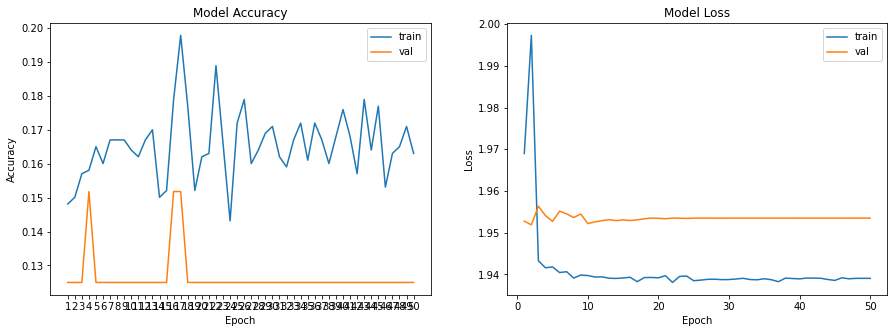

In [188]:
plot_model_history(history)

Output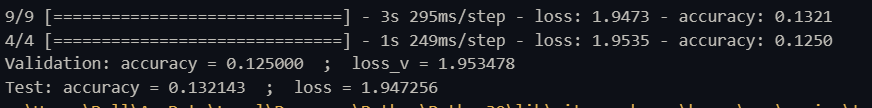

4/4 [==============================] - 2s 259ms/step


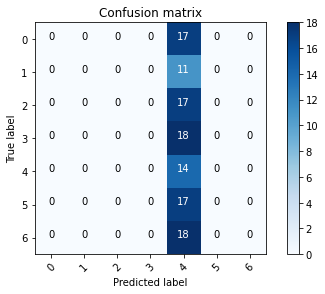

In [189]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

### Approach 2

In [17]:
new_dataset.iloc[1]

lesion_id                                              HAM_0005938
image_id                                          ISIC_0025596_HVA
dx                                                            vasc
dx_type                                                  consensus
age                                                           45.0
sex                                                         female
localization                                               abdomen
dataset                                              vidir_molemax
cell_type                                         Vascular lesions
cell_type_idx                                                    6
Feature_1                                                       50
Feature_2                                                     50.0
path             ..\Data\HAM10000_images_part_3\ISIC_0025596_HV...
image            [[[196, 148, 162], [198, 150, 164], [199, 151,...
Name: 1, dtype: object

In [29]:
import os
import h5py

#--------------------
# tunable-parameters
#--------------------
images_per_class = 80
fixed_size       = tuple((256, 256))

h5_data          = 'output/data.h5'
h5_labels        = 'output/label.h5'
bins             = 8

In [24]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [25]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [26]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [27]:
def get_hog(image, _wind_size=8, _orientations=8):
    
    """generate Histogram of gradients as a feature vector for an given image """
    
    fd, hog_image = hog(image, orientations=_orientations, pixels_per_cell=(_wind_size, _wind_size),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1, feature_vector=True)
    
    return fd

In [28]:
# get the training labels
train_labels = list(set(new_dataset.cell_type))

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions ', 'Dermatofibroma', 'Melanocytic nevi', 'Melanoma', 'Vascular lesions']


In [31]:
def filter_data(dataset,x):
    return dataset[dataset['cell_type'] == x]



def extract_features(dataset,class_):
    
    data = filter_data(dataset,class_)
    
    for index, row in data.iterrows():
        #print(row["Name"], row["Age"])

        ####################################
        # Global Feature extraction
        ####################################
        image = row['image']
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)
        fv_hog        = get_hog(image)
        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments, fv_hog])
        # update the list of labels and feature vectors
        labels.append(row['cell_type'])
        global_features.append(global_feature)
        
    print("[STATUS] processed folder: {}".format(row['cell_type']))
    

In [30]:
classes = list(set(new_dataset.cell_type))

In [32]:
for c in classes:
    extract_features(new_dataset, c)
print("[STATUS] completed Global Feature Extraction...")

[STATUS] processed folder: Melanoma
[STATUS] processed folder: Vascular lesions
[STATUS] processed folder: Actinic keratoses
[STATUS] processed folder: Melanocytic nevi
[STATUS] processed folder: Basal cell carcinoma
[STATUS] processed folder: Benign keratosis-like lesions 
[STATUS] processed folder: Dermatofibroma
[STATUS] completed Global Feature Extraction...


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

[STATUS] feature vector size (1394, 8212)
[STATUS] training Labels (1394,)
[STATUS] training labels encoded...
[STATUS] feature vector normalized...
[STATUS] target labels: [5 5 5 ... 3 3 3]
[STATUS] target labels shape: (1394,)
[STATUS] end of training..


In [34]:
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [36]:
num_trees = 100
test_size = 0.10
seed      = 9
h5_data    = 'output/data.h5'
h5_labels  = 'output/label.h5'
# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (1394, 8212)
[STATUS] labels shape: (1394,)
[STATUS] training started...


In [37]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (1254, 8212)
Test data   : (140, 8212)
Train labels: (1254,)
Test labels : (140,)


LR: 0.347651 (0.038148)


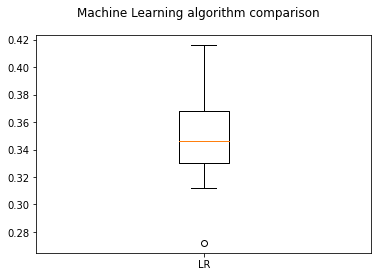

In [38]:
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

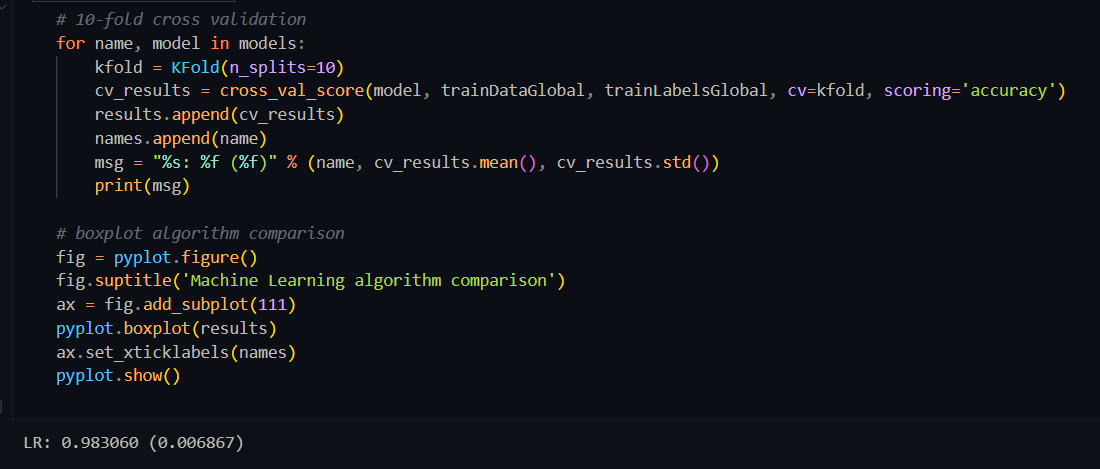

In [39]:
# create the model - Random Forests
clf  = LogisticRegression(random_state=seed)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

LogisticRegression(random_state=9)

In [43]:
clf.score(testDataGlobal, testLabelsGlobal)

0.37142857142857144

In [44]:
clf.save('ml.h5')

AttributeError: 'LogisticRegression' object has no attribute 'save'

In [46]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))